In [13]:
#libraries
import pip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

#reading data
df_04 = pd.read_stata('usu_individual_T104.dta')


df_24 = pd.read_excel('usu_individual_T124.xlsx')




From now on, each group should decide to work with a specific region of the country (see variable REGION). Remove data from all regions that are not within your region and merge both quarters (2004 and 2024) into one single base.

In [20]:
print(df_04['region'].unique())
print()
print(df_24['REGION'].unique())

['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']

[42 41 40 43 44  1]


In [21]:
t_df_04 = df_04[df_04['region'] == 'Patagónica']
t_df_24 = df_24[df_24['REGION'] == 44] # 44 because its code for Patagonica

#column names to upper so we can merge them
t_df_04.columns = t_df_04.columns.str.upper()
t_df_24.columns = t_df_24.columns.str.upper()

#merge
df_merged = pd.concat([t_df_04, t_df_24])
df_merged



,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP,CH05,IMPUTA,PONDIIO,PONDII,PONDIH
42025,125122,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,150.0,...,09,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42026,125969,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42027,125969,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42028,126757,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42029,126757,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,1,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,1988-03-29 00:00:00,NaN,130.0,129.0,126.0
46029,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,2,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2010-03-10 00:00:00,NaN,128.0,128.0,126.0
46030,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,3,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2012-12-01 00:00:00,NaN,128.0,128.0,126.0
46031,TQRMNOQXQHJMKOCDEOHCH00794205,1.0,1,1,2024.0,1,44,N,91,131.0,...,4,NaN,NaN,NaN,NaN,1995-03-03 00:00:00,NaN,133.0,133.0,135.0


Make sure that all variables have the correct format. Select 15 variables of interest and report the number of missing values (NA, or NaN in Python) in a table for each year. Comment on which of the 15 variables you selected have the most missing values and which year.

In [23]:
variables_of_interest = ['REGION','AGLOMERADO','PONDERA','CH03','CH04','CH06','CH07','CH08','CH09','CH10','CH11', 'CH12', 'CH13', 'CH14', 'CH15']

# Ensure these columns exist in the DataFrame
selected_columns = ['ANO4'] + [col for col in variables_of_interest if col in df_merged.columns]
df_m1 = df_merged[selected_columns]

# Count missing values by year
missing_by_year = df_m1.groupby('ANO4').apply(lambda x: x.isna().sum())

# Drop the 'YEAR' column from the missing count (since it's grouped by YEAR already)
missing_by_year = missing_by_year.drop(columns='ANO4')

# Display the table
print(missing_by_year)

        REGION  AGLOMERADO  PONDERA  CH03  CH04  CH06  CH07  CH08  CH09  CH10  \
ANO4                                                                            
2004.0       0           0        0     0     0     0     0     0     0     0   
2024.0       0           0        0     0     0     0     0     0     0     0   

        CH11  CH12  CH13  CH14  CH15  
ANO4                                  
2004.0     0     0     0     0     0  
2024.0     0     0     0  2789     0  


C:\Users\shana\AppData\Local\Temp\ipykernel_24896\834231287.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df_m1.groupby('ANO4').apply(lambda x: x.isna().sum())


The most missing values are in selected variable CH14 -  2789 missing values in year 2024.

If you notice meaningless values (such as negative income) correct it according to the HBS documentation (it may be a non-response coding of individuals) and remove these outliers from your 15 variables of interest. Comment briefly in the report on this cleaning process.

In [26]:
# Identifying numeric columns from our 15 selected variables of interest
numeric_columns = df_m1.select_dtypes(include=['float64', 'int64']).columns

# For numeric columns, replace negative values with NaN
df_m1[numeric_columns] = df_m1[numeric_columns].applymap(lambda x: x if x >= 0 else None)

# Confirm the cleaning by checking for minimum values in numeric columns
min_values_after_cleaning = df_m1[numeric_columns].min()

print("Minimum values after cleaning:")
print(min_values_after_cleaning)
print(numeric_columns)


Minimum values after cleaning:
ANO4       2004.0
PONDERA      33.0
dtype: float64
Index(['ANO4', 'PONDERA'], dtype='object')


C:\Users\shana\AppData\Local\Temp\ipykernel_24896\3821169461.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_m1[numeric_columns] = df_m1[numeric_columns].applymap(lambda x: x if x >= 0 else None)
C:\Users\shana\AppData\Local\Temp\ipykernel_24896\3821169461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m1[numeric_columns] = df_m1[numeric_columns].applymap(lambda x: x if x >= 0 else None)


Produce a bar chart showing the gender composition for 2004 and 2024. Comment on the results.

In [28]:
df_gender = df_m1[['CH04', 'ANO4']]
df_gender['CH04'] = df_gender['CH04'].replace({1: 'Varón', 2: 'Mujer'})

C:\Users\shana\AppData\Local\Temp\ipykernel_24896\556018339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['CH04'] = df_gender['CH04'].replace({1: 'Varón', 2: 'Mujer'})


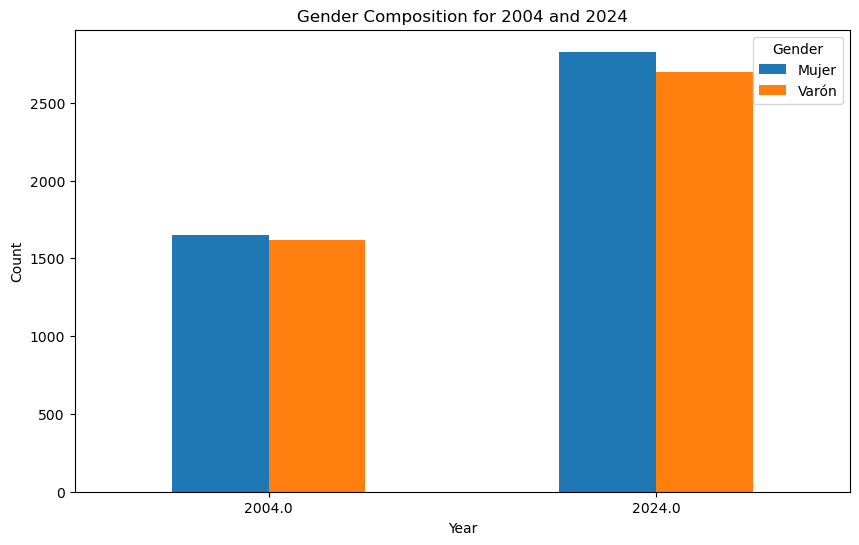

In [29]:
# Generate a bar chart for gender composition for 2004 and 2024
gender_count = df_gender.groupby(['ANO4', 'CH04']).size().unstack()

gender_count.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Gender Composition for 2004 and 2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

Make a correlation matrix for 2004 and 2024 with the following variables: CH04, CH06, CH07, CH08, ED LEVEL, STATE, CAT_INAC, IPCF. Use one of the commands available in this link or this link to plot the correlation matrix. Comment on the results.

In [31]:
variables_of_interest = [ 'ED LEVEL', 'STATE', 'CAT_INAC', 'IPCF','CH04','CH06','CH07','CH08',]

# Ensure these columns exist in the DataFrame
selected_columns = [col for col in variables_of_interest if col in df_merged.columns]
df_merged2 = df_merged[selected_columns]

In [32]:
df_merged
# we cannot perfor correlation on categorical variables

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP,CH05,IMPUTA,PONDIIO,PONDII,PONDIH
42025,125122,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,150.0,...,09,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42026,125969,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42027,125969,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42028,126757,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42029,126757,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,1,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,1988-03-29 00:00:00,NaN,130.0,129.0,126.0
46029,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,2,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2010-03-10 00:00:00,NaN,128.0,128.0,126.0
46030,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,3,1,2024.0,1,44,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2012-12-01 00:00:00,NaN,128.0,128.0,126.0
46031,TQRMNOQXQHJMKOCDEOHCH00794205,1.0,1,1,2024.0,1,44,N,91,131.0,...,4,NaN,NaN,NaN,NaN,1995-03-03 00:00:00,NaN,133.0,133.0,135.0


How many unemployed are there in the sample? How many inactive? What is the median household per capita income (GFCP) by status (employed, unemployed, inactive)?

In [34]:
df_gfcp = df_merged[['ESTADO','IPCF']]
df_gfcp['ESTADO'] = df_gfcp['ESTADO'].replace({1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor de 10 años'})
df_gfcp = df_gfcp[df_gfcp['ESTADO'] != 0]

# Count how many are inactive
inactive_count = (df_gfcp['ESTADO'] == 'Inactivo').sum()

# Median income (GFCP) by employment status
median_income_by_status = df_gfcp.groupby('ESTADO')['IPCF'].median()

print('Number of unemployed:', inactive_count)
print('Median income (GFCP) by status:')
print(median_income_by_status)


Number of unemployed: 3664
Median income (GFCP) by status:
ESTADO
Desocupado            332.500000
Inactivo            50000.000000
Menor de 10 años      568.333333
Ocupado             77500.000000
Name: IPCF, dtype: float64


C:\Users\shana\AppData\Local\Temp\ipykernel_24896\3248701251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gfcp['ESTADO'] = df_gfcp['ESTADO'].replace({1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor de 10 años'})


One of the big problems of the HBS is the increasing number of households that do not report their income (see for example the following report). How many people did not answer what their activity status is? Save as a separate base call responded the observations where they answered the question on their activity status (STATUS). The observations with STATUS=0 keep them in a base under the name noresponded.

In [36]:
# code
norespondieron = df_merged[df_merged['ESTADO'] == 0]
respondieron = df_merged[df_merged['ESTADO'] != 0]

Add a column called ‘EAP’ (Economically Active Population) to the base answer that takes 1 if they are employed or unemployed in STATE. Make a bar chart showing the composition by EAP for 2004 and 2024. Comment on the results.

C:\Users\shana\AppData\Local\Temp\ipykernel_21892\841511784.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['EAP'] = df_merged['ESTADO'].apply(lambda x: 1 if x in ['Ocupado', 'Desocupado'] else 0)


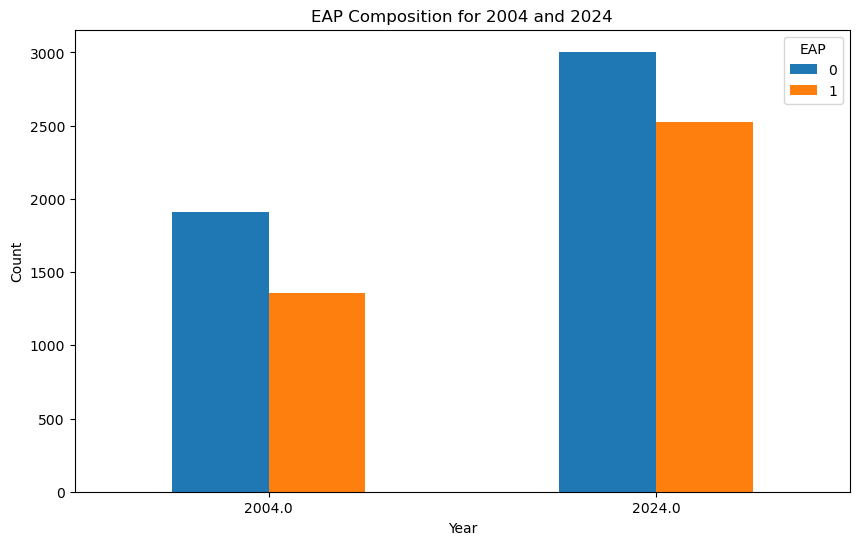

In [24]:
df_merged['ESTADO'] = df_merged['ESTADO'].replace({1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor de 10 años'})
df_merged['EAP'] = df_merged['ESTADO'].apply(lambda x: 1 if x in ['Ocupado', 'Desocupado'] else 0)

df_eap = df_merged[['EAP', 'ANO4']]
eap_count = df_eap.groupby(['ANO4', 'EAP']).size().unstack()

eap_count.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('EAP Composition for 2004 and 2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='EAP')
plt.show()

Add a column called ‘PET’ (Population of Working Age) to the base answer that takes 1 if the person is between 15 and 65 years of age. Make a bar chart showing the composition by EAP for 2004 and 2024. Comment on the results and compare PET with EAP.

In [53]:
# Replace "ESTADO" text mapping if needed (optional for this task)

# 1. Create "PET" based on age (CH06)
df_merged['PET'] = df_merged['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# 2. Create a new DataFrame with PET and year
df_pet = df_merged[['PET', 'ANO4']]
pet_count = df_pet.groupby(['ANO4', 'PET']).size().unstack()

# 3. Plot
pet_count.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('PET Composition for 2004 and 2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='PET')
plt.show()

TypeError: '<=' not supported between instances of 'int' and 'str'

Add a column called ‘unemployed’ to the base answer that takes 1 if the person is unemployed. How many people are unemployed in 2004 vs. 2024? 

In [28]:
df_merged['unemployed'] = df_merged['ESTADO'].apply(lambda x: 1 if x in ['Desocupado'] else 0)
count = (df_merged['unemployed'] == 1).sum()
unemployed_by_year = df_merged[df_merged['unemployed'] == 1].groupby('ANO4').size()
print(unemployed_by_year)

ANO4
2004.0    119
2024.0    115
dtype: int64


C:\Users\shana\AppData\Local\Temp\ipykernel_21892\2293827660.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['unemployed'] = df_merged['ESTADO'].apply(lambda x: 1 if x in ['Desocupado'] else 0)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=096ede0e-fb6d-4c63-ba59-d8bef62303c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [ ]:
# --- a. Proporción de desocupados por nivel educativo (NIVEL_ED) ---

# Filter unemployed people
unemployed = df_merged[df_merged['unemployed'] == 1]

# Group by year and education level
unemployed_by_edu = unemployed.groupby(['ANO4', 'NIVEL_ED']).size().unstack(fill_value=0)

# Normalize to proportions (percentages)
unemployed_by_edu_prop = unemployed_by_edu.div(unemployed_by_edu.sum(axis=1), axis=0)

# Plot
unemployed_by_edu_prop.T[[2004, 2024]].plot(kind='bar', figsize=(12,6))
plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(axis='y')
plt.show()


# --- b. Proporción de desocupados por grupos de edad de 10 años ---

# Create age groups
bins = list(range(0, 100, 10)) + [150]  # 0-9, 10-19, ..., 90-99, 100+
labels = [f'{i}-{i+9}' for i in range(0, 90, 10)] + ['90+']
df_merged['age_group'] = pd.cut(df_merged['CH06'], bins=bins, labels=labels, right=False)

# Group unemployed by year and age group
unemployed_by_age = unemployed.groupby(['ANO4', 'age_group']).size().unstack(fill_value=0)

# Normalize to proportions
unemployed_by_age_prop = unemployed_by_age.div(unemployed_by_age.sum(axis=1), axis=0)

# Plot
unemployed_by_age_prop.T[[2004, 2024]].plot(kind='bar', figsize=(12,6))
plt.title('Proporción de Desocupados por Edad Agrupada (2004 vs 2024)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(axis='y')
plt.show()


# --- c. Proporción de desocupados por sexo (CH04) ---

# Group unemployed by year and sex
unemployed_by_sex = unemployed.groupby(['ANO4', 'CH04']).size().unstack(fill_value=0)

# Normalize to proportions
unemployed_by_sex_prop = unemployed_by_sex.div(unemployed_by_sex.sum(axis=1), axis=0)

